In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
# Importing dataset
churn = pd.read_csv('C:/Users/Amrutha Mukundan/Desktop/Data_Science/Swarup_Practice/Churn_Modelling.csv')
churn.shape

(10000, 14)

In [3]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
X = churn.iloc[:, 3:13].values
y = churn.iloc[:,13].values
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [5]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [6]:
# Encoding categorical data
# Encoding the column Geography
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:,1] = labelencoder_X_1.fit_transform(X[:,1])
# Encoding the column Gender
labelencoder_X_2 = LabelEncoder()
X[:,2] = labelencoder_X_2.fit_transform(X[:,2])
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]
X

C:\Users\Amrutha Mukundan\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Amrutha Mukundan\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[0.0000000e+00, 0.0000000e+00, 6.1900000e+02, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [0.0000000e+00, 1.0000000e+00, 6.0800000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [0.0000000e+00, 0.0000000e+00, 5.0200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [0.0000000e+00, 0.0000000e+00, 7.0900000e+02, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [1.0000000e+00, 0.0000000e+00, 7.7200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [0.0000000e+00, 0.0000000e+00, 7.9200000e+02, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [7]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [9]:
# Splitting the dataset int training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [10]:
# Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

# Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators = 100)

# Train the model using the training sets y_pred = clf.predict(X_test)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [11]:
# Import sci-kit learn metrics module for accuracy calculation 
from sklearn import metrics

# Model Accuracy,  how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.866


In [13]:
# Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2281   98]
 [ 304  317]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2379
           1       0.76      0.51      0.61       621

    accuracy                           0.87      3000
   macro avg       0.82      0.73      0.77      3000
weighted avg       0.86      0.87      0.86      3000



In [14]:
# ROC
probs = clf.predict_proba(X_test)
probs

array([[0.61, 0.39],
       [0.8 , 0.2 ],
       [0.88, 0.12],
       ...,
       [0.96, 0.04],
       [0.98, 0.02],
       [0.36, 0.64]])

In [15]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
probs = probs[:, 1]
probs

array([0.39, 0.2 , 0.12, ..., 0.04, 0.02, 0.64])

In [16]:
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' % auc)

AUC: 0.87


In [17]:
fpr, tpr, thresholds = roc_curve(y_test, probs)

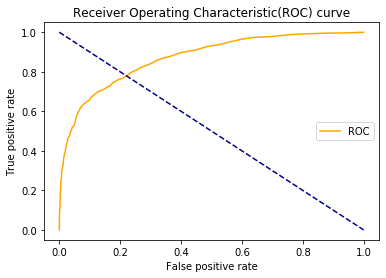

In [18]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color = 'orange', label = 'ROC')
    plt.plot([0,1],[1,0], color = 'darkblue', linestyle = '--')
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('Receiver Operating Characteristic(ROC) curve')
    plt.legend()
    plt.show()
plot_roc_curve(fpr, tpr)